In [87]:
import numpy as np
import pandas as pd
import json
from pathlib import Path
import matplotlib.pyplot as plt

In [88]:
result_path = Path("./results/history.jsonl")
result_path.exists()

True

In [89]:
csv_path = Path("./results/history.csv")

# load data

In [90]:
raw_data = []
with open(result_path, "r") as f:
    for line in f:
        raw_data.append(json.loads(line))
len(raw_data)

20

In [91]:
raw_data[0]

{'camera0': {'cycle_results': {'1': {'image_timestamp': 'camera0--image--20241024-084501.802983--1',
    'box': [1705, 1257, 1887, 1439],
    'center': [1795.4425908009193, 1347.1493160860857],
    'radii': [34.94463452064369, 76.55856433063185],
    'distance': 2191.027704744402,
    'exposure_time': 160228,
    'offset': [0, 0]},
   '0': {'image_timestamp': 'camera0--image--20241024-084504.803216--0',
    'box': [1986, 1252, 2168, 1434],
    'center': [2076.4993683143944, 1342.4861123094745],
    'radii': [34.845864251241956, 76.11396326869777],
    'distance': 2203.826056090494,
    'exposure_time': 164314,
    'offset': [0, 0]}},
  'pixel_move_result': {'1': [0, 0], '0': [0, 0]},
  'pixel_move_result_without_ref': {'1': [0, 0], '0': [0, 0]},
  'real_move_result': {'1': [0, 0], '0': [0, 0]},
  'real_move_result_without_ref': {'1': [0, 0], '0': [0, 0]}},
 'temperature': {'L3_WK_1': 10.09,
  'L3_WK_2': 23.85,
  'L3_WK_3': 24.0,
  'L3_WK_4': 21.67,
  'L3_WK_5': 22.35,
  'L3_WK_6': 257,

In [92]:
camera0_pixel_move_results = []
camera0_pixel_move_results_without_ref = []
camera0_real_move_results = []
camera0_real_move_results_without_ref = []
camera0_is_temp_stable_results = []
temperature_results = []
camera0_times = []
for data in raw_data:
    camera0: dict = data["camera0"]

    pixel_move_result: dict = camera0["pixel_move_result"]
    pixel_move_result = dict(sorted(pixel_move_result.items(), key=lambda x: x[0]))
    camera0_pixel_move_results.append(
        [i for v in pixel_move_result.values() for i in v]
    )

    pixel_move_result_without_ref: dict = camera0["pixel_move_result_without_ref"]
    pixel_move_result_without_ref = dict(
        sorted(pixel_move_result_without_ref.items(), key=lambda x: x[0])
    )
    camera0_pixel_move_results_without_ref.append(
        [i for v in pixel_move_result_without_ref.values() for i in v]
    )

    real_move_result: dict = camera0["real_move_result"]
    real_move_result = dict(sorted(real_move_result.items(), key=lambda x: x[0]))
    camera0_real_move_results.append([i for v in real_move_result.values() for i in v])

    real_move_result_without_ref: dict = camera0["real_move_result_without_ref"]
    real_move_result_without_ref = dict(
        sorted(real_move_result_without_ref.items(), key=lambda x: x[0])
    )
    camera0_real_move_results_without_ref.append(
        [i for v in real_move_result_without_ref.values() for i in v]
    )

    temperature_results.append(data["temperature"])

    is_temp_stable: bool = data["is_temp_stable"]
    camera0_is_temp_stable_results.append([is_temp_stable])

    time = data["time"]
    camera0_times.append([time])

In [93]:
concat_results = np.concatenate(
    (
        camera0_pixel_move_results,
        camera0_pixel_move_results_without_ref,
        camera0_real_move_results,
        camera0_real_move_results_without_ref,
        camera0_is_temp_stable_results,
    ),
    axis=1,
)
concat_results.shape

(20, 17)

In [94]:
len(camera0_pixel_move_results[0]) / 2

2.0

In [95]:
pixel_move_columns = [
    [f"pixel_move_{i}_x", f"pixel_move_{i}_y"]
    for i in range(len(camera0_pixel_move_results[0]) // 2)
]
pixel_move_columns = [item for sublist in pixel_move_columns for item in sublist]
pixel_move_columns

['pixel_move_0_x', 'pixel_move_0_y', 'pixel_move_1_x', 'pixel_move_1_y']

In [96]:
pixel_move_without_ref_columns = [
    [f"pixel_move_without_ref_{i}_x", f"pixel_move_without_ref_{i}_y"]
    for i in range(len(camera0_pixel_move_results_without_ref[0]) // 2)
]
pixel_move_without_ref_columns = [item for sublist in pixel_move_without_ref_columns for item in sublist]
pixel_move_without_ref_columns

['pixel_move_without_ref_0_x',
 'pixel_move_without_ref_0_y',
 'pixel_move_without_ref_1_x',
 'pixel_move_without_ref_1_y']

In [97]:
real_move_columns = [
    [f"real_move_{i}_x", f"real_move_{i}_y"]
    for i in range(len(camera0_real_move_results[0]) // 2)
]
real_move_columns = [item for sublist in real_move_columns for item in sublist]
real_move_columns

['real_move_0_x', 'real_move_0_y', 'real_move_1_x', 'real_move_1_y']

In [98]:
real_move_without_ref_columns = [
    [f"real_move_without_ref_{i}_x", f"real_move_without_ref_{i}_y"]
    for i in range(len(camera0_real_move_results_without_ref[0]) // 2)
]
real_move_without_ref_columns = [item for sublist in real_move_without_ref_columns for item in sublist]
real_move_without_ref_columns

['real_move_without_ref_0_x',
 'real_move_without_ref_0_y',
 'real_move_without_ref_1_x',
 'real_move_without_ref_1_y']

In [99]:
df1 = pd.DataFrame(
    concat_results,
    columns=pixel_move_columns
    + pixel_move_without_ref_columns
    + real_move_columns
    + real_move_without_ref_columns
    + [
        "is_temp_stable",
    ],
)
df1.head()

,pixel_move_0_x,pixel_move_0_y,pixel_move_1_x,pixel_move_1_y,pixel_move_without_ref_0_x,pixel_move_without_ref_0_y,pixel_move_without_ref_1_x,pixel_move_without_ref_1_y,real_move_0_x,real_move_0_y,real_move_1_x,real_move_1_y,real_move_without_ref_0_x,real_move_without_ref_0_y,real_move_without_ref_1_x,real_move_without_ref_1_y,is_temp_stable
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
1,-0.005894,0.009826,-0.012319,0.035015,-0.005894,0.009826,-0.012319,0.035015,-0.0025,0.0042,-0.0052,0.0149,-0.0025,0.0042,-0.0052,0.0149,0.0
2,-0.003182,0.007398,-0.004977,0.030986,-0.003182,0.007398,-0.004977,0.030986,-0.0014,0.0032,-0.0021,0.0132,-0.0014,0.0032,-0.0021,0.0132,0.0
3,-0.011034,0.027846,0.006923,0.030655,-0.011034,0.027846,-0.004110,0.058500,-0.0047,0.0119,0.0030,0.0129,-0.0047,0.0119,-0.0017,0.0248,0.0
4,-0.033746,0.050934,0.041007,0.004543,-0.033746,0.050934,0.007261,0.055477,-0.0144,0.0217,0.0175,0.0019,-0.0144,0.0217,0.0031,0.0236,0.0


In [100]:
temperature_results[0]

{'L3_WK_1': 10.09,
 'L3_WK_2': 23.85,
 'L3_WK_3': 24.0,
 'L3_WK_4': 21.67,
 'L3_WK_5': 22.35,
 'L3_WK_6': 257,
 'L3_WK_7': 257,
 'L3_WK_8': 257}

In [101]:
temp_columns = ["inside", "outside", "CPU", "holder", "lens", "undefined1", "undefined2", "undefined3"]
if len(temperature_results[0]) == 8:
    df2 = pd.DataFrame(temperature_results)
    df2.columns = temp_columns
else:
    df2 = pd.DataFrame()
df2.head()

,inside,outside,CPU,holder,lens,undefined1,undefined2,undefined3
0,10.09,23.85,24.00,21.67,22.35,257,257,257
1,11.39,23.90,24.76,22.10,22.79,257,257,257
2,12.08,23.92,24.97,22.35,23.05,257,257,257
3,18.02,24.16,26.20,24.70,25.75,257,257,257
4,18.51,24.20,26.57,24.89,25.97,257,257,257


In [102]:
df3 = pd.DataFrame(camera0_times, columns=["time"])
df3.head()

,time
0,2024-10-24 08:45:05
1,2024-10-24 08:45:12
2,2024-10-24 08:45:19
3,2024-10-24 08:46:45
4,2024-10-24 08:46:54


In [103]:
if len(temperature_results[0]) > 0:
    df = pd.concat([df1, df2, df3], axis=1)
else:
    df = pd.concat([df1, df3], axis=1)
df.head()

,pixel_move_0_x,pixel_move_0_y,pixel_move_1_x,pixel_move_1_y,pixel_move_without_ref_0_x,pixel_move_without_ref_0_y,pixel_move_without_ref_1_x,pixel_move_without_ref_1_y,real_move_0_x,real_move_0_y,...,is_temp_stable,inside,outside,CPU,holder,lens,undefined1,undefined2,undefined3,time
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,...,0.0,10.09,23.85,24.00,21.67,22.35,257,257,257,2024-10-24 08:45:05
1,-0.005894,0.009826,-0.012319,0.035015,-0.005894,0.009826,-0.012319,0.035015,-0.0025,0.0042,...,0.0,11.39,23.90,24.76,22.10,22.79,257,257,257,2024-10-24 08:45:12
2,-0.003182,0.007398,-0.004977,0.030986,-0.003182,0.007398,-0.004977,0.030986,-0.0014,0.0032,...,0.0,12.08,23.92,24.97,22.35,23.05,257,257,257,2024-10-24 08:45:19
3,-0.011034,0.027846,0.006923,0.030655,-0.011034,0.027846,-0.004110,0.058500,-0.0047,0.0119,...,0.0,18.02,24.16,26.20,24.70,25.75,257,257,257,2024-10-24 08:46:45
4,-0.033746,0.050934,0.041007,0.004543,-0.033746,0.050934,0.007261,0.055477,-0.0144,0.0217,...,0.0,18.51,24.20,26.57,24.89,25.97,257,257,257,2024-10-24 08:46:54


In [104]:
df.describe()

,pixel_move_0_x,pixel_move_0_y,pixel_move_1_x,pixel_move_1_y,pixel_move_without_ref_0_x,pixel_move_without_ref_0_y,pixel_move_without_ref_1_x,pixel_move_without_ref_1_y,real_move_0_x,real_move_0_y,...,real_move_without_ref_1_y,is_temp_stable,inside,outside,CPU,holder,lens,undefined1,undefined2,undefined3
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.0,20.0
mean,0.009260,0.091986,0.008716,0.091279,0.009260,0.091986,0.003303,0.110938,0.003955,0.039275,...,0.047100,0.0,21.108500,24.567500,29.247500,26.432000,27.743000,257.0,257.0,257.0
std,0.025873,0.058470,0.017525,0.074000,0.025873,0.058470,0.019598,0.058626,0.011043,0.024969,...,0.024883,0.0,5.177959,0.471915,3.106219,2.489366,2.845425,0.0,0.0,0.0
min,-0.033746,0.000000,-0.014310,0.000000,-0.033746,0.000000,-0.035580,0.000000,-0.014400,0.000000,...,0.000000,0.0,10.090000,23.850000,24.000000,21.670000,22.350000,257.0,257.0,257.0
25%,-0.007179,0.050408,-0.005144,0.026679,-0.007179,0.050408,-0.005144,0.066654,-0.003050,0.021475,...,0.028250,0.0,18.862500,24.222500,26.877500,25.047500,26.157500,257.0,257.0,257.0
50%,-0.000508,0.092075,0.003584,0.079873,-0.000508,0.092075,-0.000409,0.114651,-0.000200,0.039300,...,0.048650,0.0,21.970000,24.510000,29.195000,26.600000,27.940000,257.0,257.0,257.0
75%,0.025522,0.137962,0.018257,0.159145,0.025522,0.137962,0.016411,0.159145,0.010900,0.058925,...,0.067575,0.0,25.190000,24.950000,31.937500,28.452500,30.015000,257.0,257.0,257.0
max,0.056648,0.180005,0.044779,0.196354,0.056648,0.180005,0.044779,0.196354,0.024200,0.076900,...,0.083400,0.0,27.180000,25.350000,33.860000,29.830000,31.710000,257.0,257.0,257.0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pixel_move_0_x              20 non-null     float64
 1   pixel_move_0_y              20 non-null     float64
 2   pixel_move_1_x              20 non-null     float64
 3   pixel_move_1_y              20 non-null     float64
 4   pixel_move_without_ref_0_x  20 non-null     float64
 5   pixel_move_without_ref_0_y  20 non-null     float64
 6   pixel_move_without_ref_1_x  20 non-null     float64
 7   pixel_move_without_ref_1_y  20 non-null     float64
 8   real_move_0_x               20 non-null     float64
 9   real_move_0_y               20 non-null     float64
 10  real_move_1_x               20 non-null     float64
 11  real_move_1_y               20 non-null     float64
 12  real_move_without_ref_0_x   20 non-null     float64
 13  real_move_without_ref_0_y   20 non-nu

In [106]:
df = df.where(df.iloc[:, :-1] < 100000)
df.head()

,pixel_move_0_x,pixel_move_0_y,pixel_move_1_x,pixel_move_1_y,pixel_move_without_ref_0_x,pixel_move_without_ref_0_y,pixel_move_without_ref_1_x,pixel_move_without_ref_1_y,real_move_0_x,real_move_0_y,...,is_temp_stable,inside,outside,CPU,holder,lens,undefined1,undefined2,undefined3,time
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,...,0.0,10.09,23.85,24.00,21.67,22.35,257,257,257,NaN
1,-0.005894,0.009826,-0.012319,0.035015,-0.005894,0.009826,-0.012319,0.035015,-0.0025,0.0042,...,0.0,11.39,23.90,24.76,22.10,22.79,257,257,257,NaN
2,-0.003182,0.007398,-0.004977,0.030986,-0.003182,0.007398,-0.004977,0.030986,-0.0014,0.0032,...,0.0,12.08,23.92,24.97,22.35,23.05,257,257,257,NaN
3,-0.011034,0.027846,0.006923,0.030655,-0.011034,0.027846,-0.004110,0.058500,-0.0047,0.0119,...,0.0,18.02,24.16,26.20,24.70,25.75,257,257,257,NaN
4,-0.033746,0.050934,0.041007,0.004543,-0.033746,0.050934,0.007261,0.055477,-0.0144,0.0217,...,0.0,18.51,24.20,26.57,24.89,25.97,257,257,257,NaN


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pixel_move_0_x              20 non-null     float64
 1   pixel_move_0_y              20 non-null     float64
 2   pixel_move_1_x              20 non-null     float64
 3   pixel_move_1_y              20 non-null     float64
 4   pixel_move_without_ref_0_x  20 non-null     float64
 5   pixel_move_without_ref_0_y  20 non-null     float64
 6   pixel_move_without_ref_1_x  20 non-null     float64
 7   pixel_move_without_ref_1_y  20 non-null     float64
 8   real_move_0_x               20 non-null     float64
 9   real_move_0_y               20 non-null     float64
 10  real_move_1_x               20 non-null     float64
 11  real_move_1_y               20 non-null     float64
 12  real_move_without_ref_0_x   20 non-null     float64
 13  real_move_without_ref_0_y   20 non-nu

In [108]:
df.describe()

,pixel_move_0_x,pixel_move_0_y,pixel_move_1_x,pixel_move_1_y,pixel_move_without_ref_0_x,pixel_move_without_ref_0_y,pixel_move_without_ref_1_x,pixel_move_without_ref_1_y,real_move_0_x,real_move_0_y,...,real_move_without_ref_1_y,is_temp_stable,inside,outside,CPU,holder,lens,undefined1,undefined2,undefined3
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.0,20.0
mean,0.009260,0.091986,0.008716,0.091279,0.009260,0.091986,0.003303,0.110938,0.003955,0.039275,...,0.047100,0.0,21.108500,24.567500,29.247500,26.432000,27.743000,257.0,257.0,257.0
std,0.025873,0.058470,0.017525,0.074000,0.025873,0.058470,0.019598,0.058626,0.011043,0.024969,...,0.024883,0.0,5.177959,0.471915,3.106219,2.489366,2.845425,0.0,0.0,0.0
min,-0.033746,0.000000,-0.014310,0.000000,-0.033746,0.000000,-0.035580,0.000000,-0.014400,0.000000,...,0.000000,0.0,10.090000,23.850000,24.000000,21.670000,22.350000,257.0,257.0,257.0
25%,-0.007179,0.050408,-0.005144,0.026679,-0.007179,0.050408,-0.005144,0.066654,-0.003050,0.021475,...,0.028250,0.0,18.862500,24.222500,26.877500,25.047500,26.157500,257.0,257.0,257.0
50%,-0.000508,0.092075,0.003584,0.079873,-0.000508,0.092075,-0.000409,0.114651,-0.000200,0.039300,...,0.048650,0.0,21.970000,24.510000,29.195000,26.600000,27.940000,257.0,257.0,257.0
75%,0.025522,0.137962,0.018257,0.159145,0.025522,0.137962,0.016411,0.159145,0.010900,0.058925,...,0.067575,0.0,25.190000,24.950000,31.937500,28.452500,30.015000,257.0,257.0,257.0
max,0.056648,0.180005,0.044779,0.196354,0.056648,0.180005,0.044779,0.196354,0.024200,0.076900,...,0.083400,0.0,27.180000,25.350000,33.860000,29.830000,31.710000,257.0,257.0,257.0


In [109]:
df.to_csv(csv_path)

# draw

Text(0.5, 1.0, 'Pixel Move')

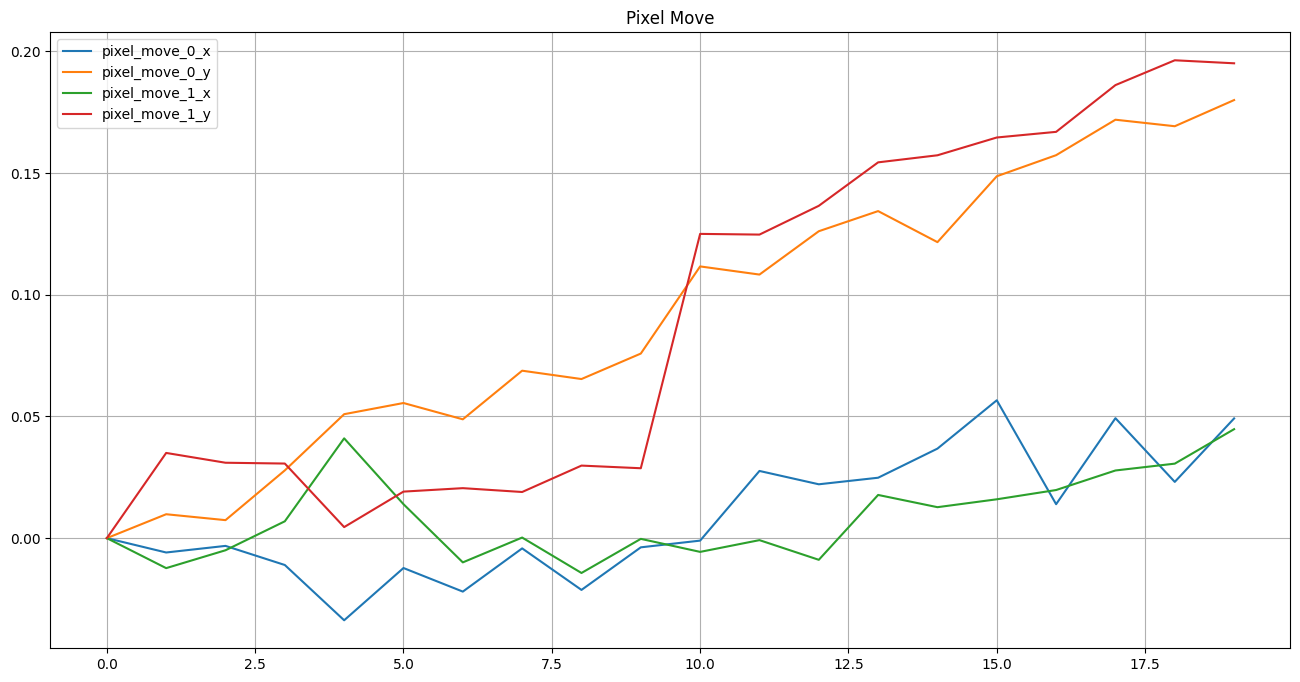

In [110]:
df[pixel_move_columns].plot(
    figsize=(16, 8)
)
plt.grid()
plt.legend()
plt.title("Pixel Move")

Text(0.5, 1.0, 'Pixel Move Without Reference')

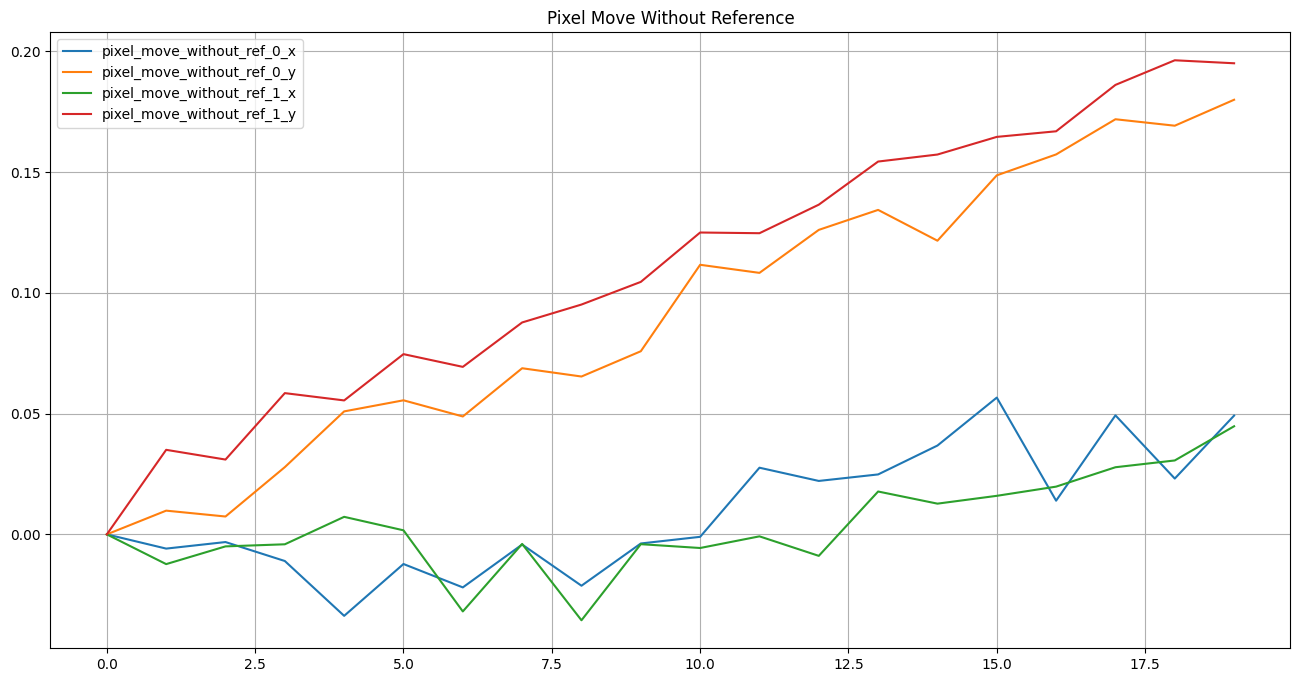

In [111]:
df[pixel_move_without_ref_columns].plot(figsize=(16, 8))
plt.grid()
plt.legend()
plt.title("Pixel Move Without Reference")

Text(0.5, 1.0, 'Real Move')

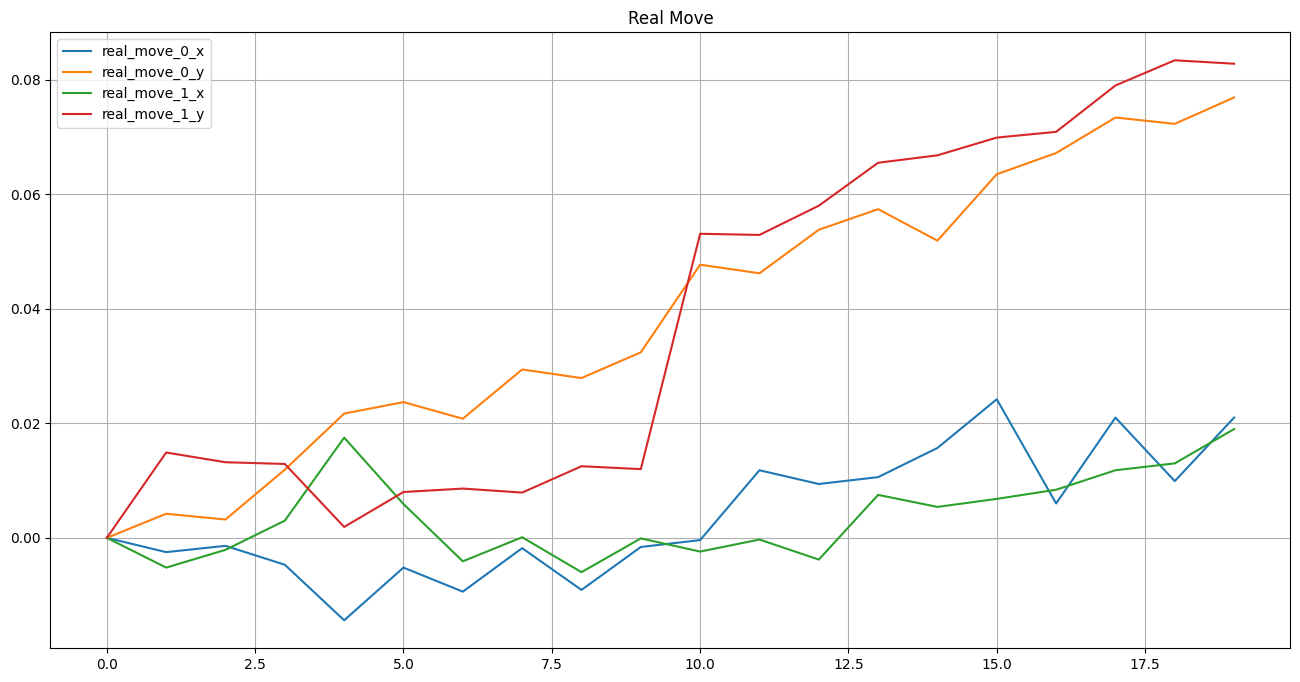

In [112]:
df[real_move_columns].plot(
    figsize=(16, 8)
)
plt.grid()
plt.legend()
plt.title("Real Move")

Text(0.5, 1.0, 'Real Move Without Reference')

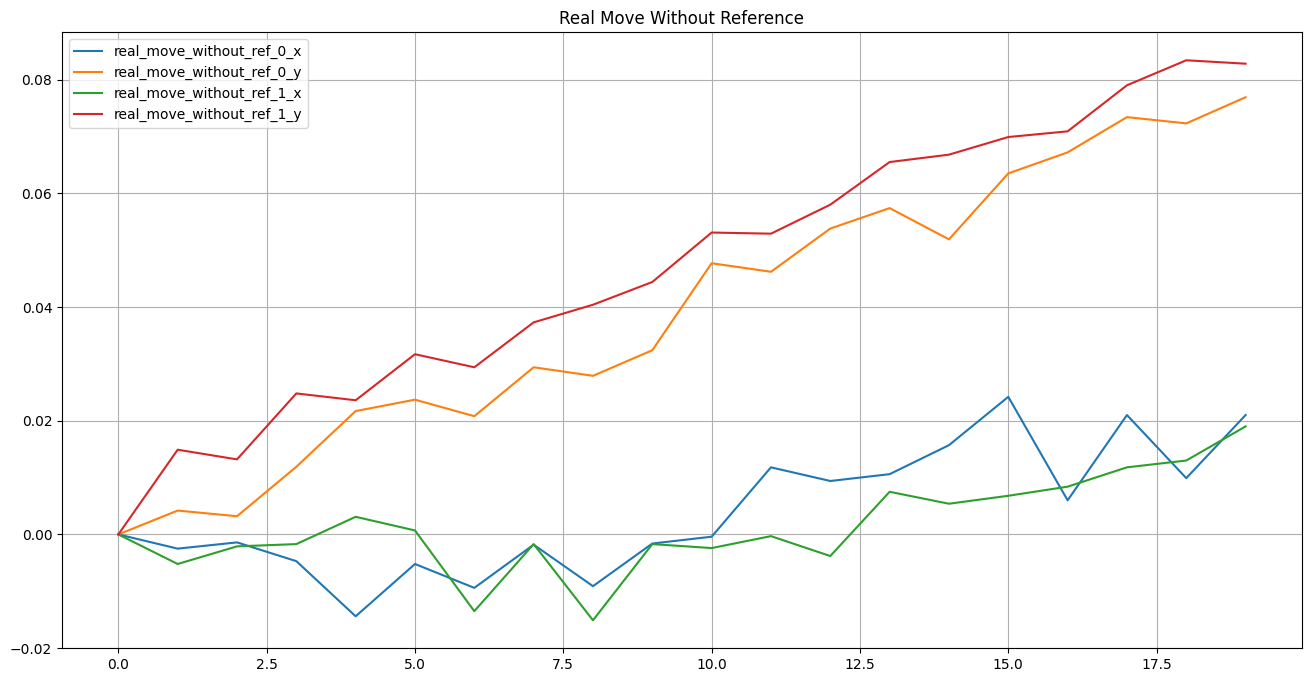

In [113]:
df[real_move_without_ref_columns].plot(figsize=(16, 8))
plt.grid()
plt.legend()
plt.title("Real Move Without Reference")

Text(0.5, 1.0, 'Temperature')

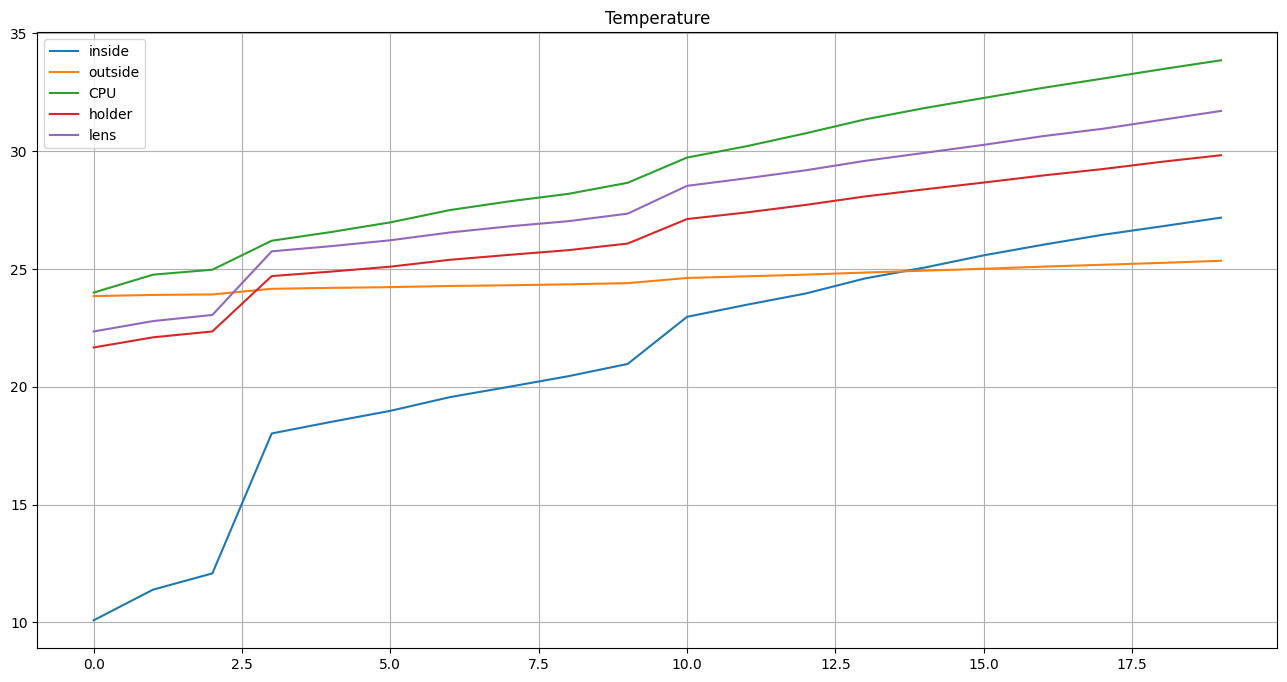

In [114]:
if len(temperature_results[0]) == 8:
    df[temp_columns[:-3]].plot(figsize=(16, 8))
plt.grid()
plt.legend()
plt.title("Temperature")